In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [9]:
df = pd.read_csv('C:\Apps\data-analysis-hse\data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [11]:
df = df.dropna()



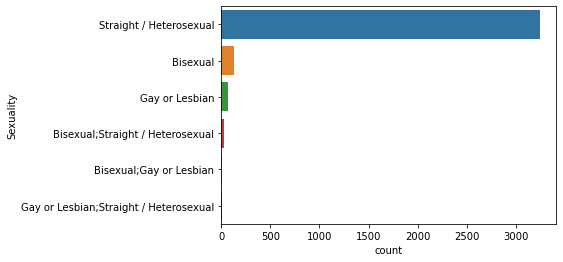

In [25]:
sns.countplot(data =df, y="Sexuality")

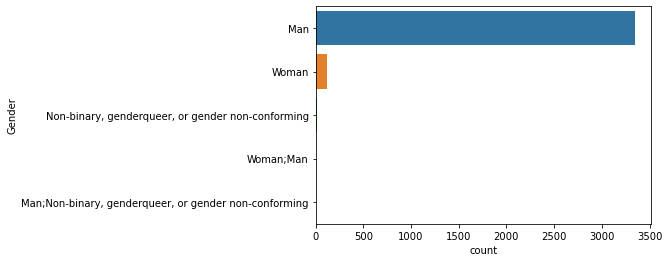

In [24]:
sns.countplot(data =df, y="Gender")

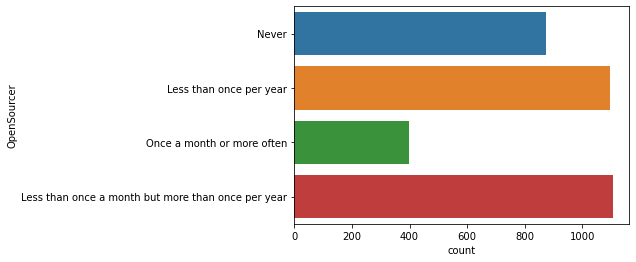

In [21]:
sns.countplot(y='OpenSourcer', data=df)

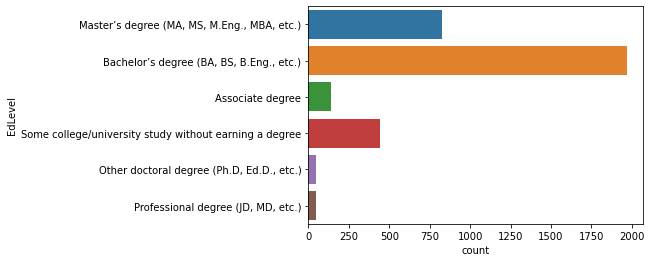

In [26]:
sns.countplot(y='EdLevel', data=df)

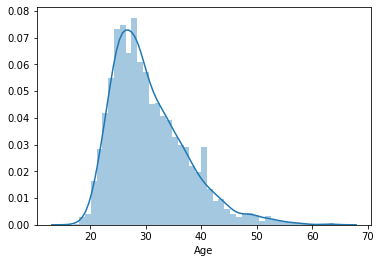

In [45]:
sns.distplot(df['Age']);

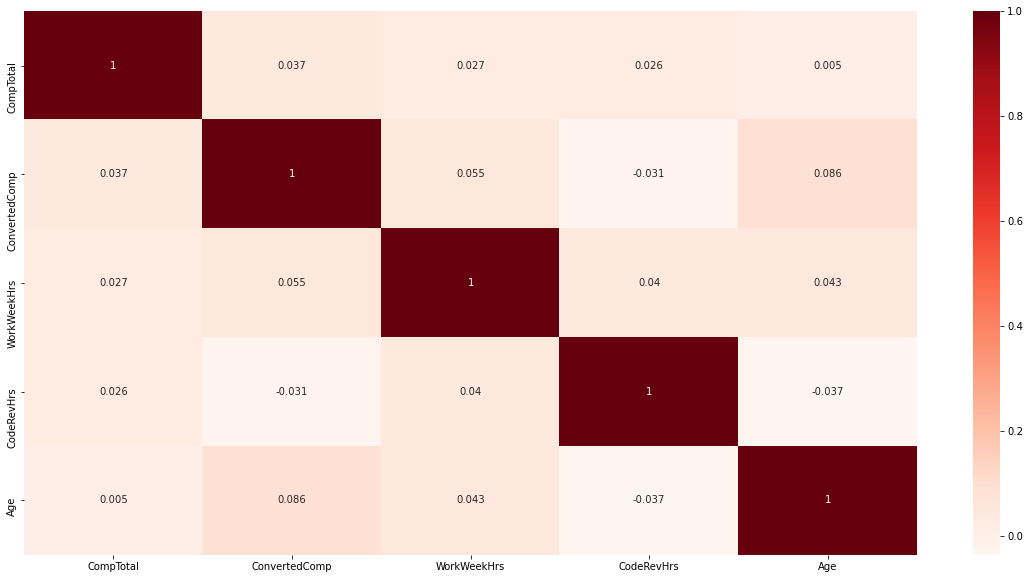

In [40]:
#df = df.drop(['Respondent'], axis=1)

plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
crosstab = pd.crosstab(df['EdLevel'], df['MgrWant'])
stats.chi2_contingency(crosstab)

(32.50140267531448,
 0.005498296121778728,
 15,
 array([[  9.48028777,  43.76460432,  51.44690647,  37.30820144],
        [131.65582734, 607.77323741, 714.45985612, 518.11107914],
        [ 55.0123741 , 253.95798561, 298.53697842, 216.49266187],
        [  3.13784173,  14.48546763,  17.02820144,  12.34848921],
        [  3.20460432,  14.79366906,  17.3905036 ,  12.61122302],
        [ 29.50906475, 136.22503597, 160.13755396, 116.12834532]]))

We see that Chi-square test is applicable, because all expected frequences in the array are greater than 5.

H0: there is no relation between MgrWant and EdLevel

H1: there is a relation between MgrWant and EdLevel

We can see that p-value = 0.005498296121778728 < 0.05, so we should **reject H0 and accept H1 - there is a relation**.

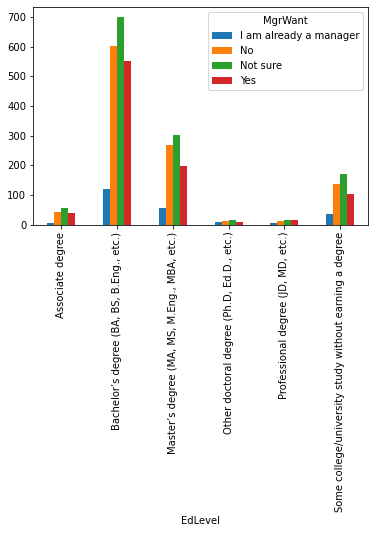

In [56]:
crosstab.plot(kind="bar", stacked=False)

In [53]:
crosstab1 = pd.crosstab(df['MgrWant'], df['JobSeek'])
stats.chi2_contingency(crosstab1)

(35.789687307464774,
 3.028583246003562e-06,
 6,
 array([[ 25.90388489,  60.62043165, 145.47568345],
        [119.58215827, 279.84690647, 671.57093525],
        [140.57323741, 328.97035971, 789.45640288],
        [101.94071942, 238.56230216, 572.49697842]]))

We see that Chi-square test is applicable, because all expected frequences in the array are greater than 5.

H0: there is no relation between MgrWant and JobSeek

H1: there is a relation between MgrWant and JobSeek

We can see that p-value = 0.005498296121778728 < 0.05, so we should reject H0 and accept H1 - there is a relation.

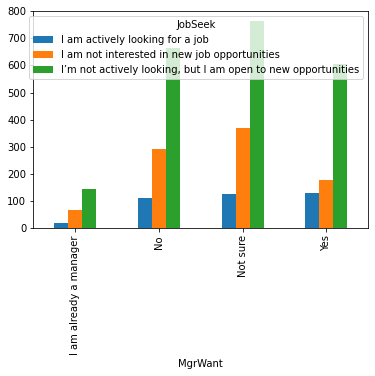

In [57]:
crosstab1.plot(kind="bar", stacked=False)

In [58]:
fvalue, pvalue = stats.f_oneway(df['CompTotal'], df['ConvertedComp'], df['WorkWeekHrs'], df['Age'])
print(fvalue, pvalue)

4.305428730542931 0.004833639728347466


In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'Age'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),4.300635e+16,3.0,4.305429,0.004834
Residual,4.626842e+19,13896.0,NaN,NaN


In [128]:
import scipy.stats as ss

a = df.loc[df['EdLevel'] == 'Associate degree']
c = df.loc[df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)']
d = df.loc[df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)']
e = df.loc[df['EdLevel'] == 'Some college/university study without earning a degree']
f = df.loc[df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)']

stats.f_oneway(a['ConvertedComp'], c['ConvertedComp'], d['ConvertedComp'], e['ConvertedComp'], f['ConvertedComp'])

F_onewayResult(statistic=0.21982272571497116, pvalue=0.9274925096871679)

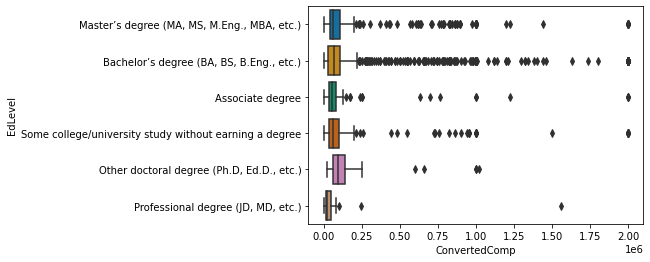

In [127]:
data_to_plot = [a['CompTotal'], c['CompTotal'], d['CompTotal'], e['CompTotal'], f['CompTotal']]
# fig = plt.figure(1, figsize=(9, 3))

# # Create an axes instance
# ax = fig.add_subplot(111)

# # Create the boxplot
# bp = ax.boxplot(data_to_plot)
sns.boxplot(y='EdLevel', x='ConvertedComp', 
                 data=df, 
                 palette="colorblind")
#                  hue='year')

In [135]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [df['WorkWeekHrs'],df['ConvertedComp']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=2036135.351, p=0.000
Probably dependent


In [139]:
from scipy.stats import chi2_contingency
table = [df['CodeRevHrs'],df['ConvertedComp']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=1373059.651, p=0.000
Probably dependent


In [140]:
from scipy.stats import chi2_contingency
table = [df['Age'],df['ConvertedComp']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=1635938.530, p=0.000
Probably dependent
